In [2]:
%matplotlib inline
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [3]:
# styling
from matplotlib import rcParams
pd.set_option('display.max_columns',150)

# figure size in inches
rcParams['figure.figsize'] = 19,8

# warnings
warnings.filterwarnings('ignore')

path="responses.csv"
dataset = pd.read_csv(path)
dataset.head(3)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats


## Estadísticas descriptivas


***Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. ¿Responden a alguna distribución conocida?***

In [4]:
peso = dataset.Weight
edad = dataset.Age

print('Cantidad de personas que no completaron el campo de peso: {:.0f}'.
      format(dataset.Weight.isnull().sum()))
print('Cantidad de personas que no completaron el campo de edad: {:.0f}'.
      format(dataset.Age.isnull().sum()))
print()
print("Moda de peso: {:.0f}".format(peso.mode().values[0]))
print("Media de peso: {:.2f}".format(peso.mean()))
print("Mediana de peso: {:.0f}".format(peso.median()))
print("Desviación estandar de peso: {:.2f}".format(peso.std()))
print()
print("Moda de edad: {:.0f}".format(edad.mode().values[0]))
print("Media de edad: {:.2f}".format(edad.mean()))
print("Mediana de edad: {:.0f}".format(edad.median()))
print("Desviación estandar de edad: {:.2f}".format(edad.std()))


Cantidad de personas que no completaron el campo de peso: 20
Cantidad de personas que no completaron el campo de edad: 7

Moda de peso: 60
Media de peso: 66.41
Mediana de peso: 64
Desviación estandar de peso: 13.84

Moda de edad: 19
Media de edad: 20.43
Mediana de edad: 20
Desviación estandar de edad: 2.83


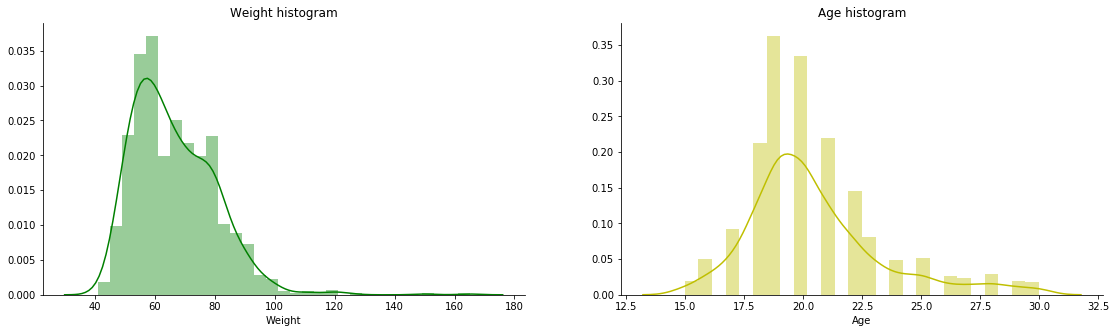

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19,5))
dsw = dataset.Weight.dropna()
dsa = dataset.Age.dropna()
ax[0].set_title("Weight histogram")
sns.distplot(dsw, ax=ax[0], color="g")
ax[1].set_title("Age histogram")
sns.distplot(dsa, ax=ax[1], color="y")
sns.despine()


In [6]:
 def ajuste_normal(pvalor, var):
 # queremos confianza al 99%
    if pvalor < 0.01:
        print("{} no se ajusta a una normal.".format(var))
    else:
        print("{} se ajusta a una normal.".format(var))
      
media, desviacion = ss.norm.fit(dataset.Age)
d, pvalor = ss.kstest(dataset.Age,"norm",args=(media,desviacion))
ajuste_normal(pvalor, 'La edad')

media, desviacion = ss.norm.fit(dataset.Weight)
d, pvalor = ss.kstest(dataset.Weight,"norm",args=(media,desviacion))
ajuste_normal(pvalor, 'El peso')

La edad se ajusta a una normal.
El peso se ajusta a una normal.


Ambas variables se ajustan a la distribución normal

***Realizar un análisis de outliers.***


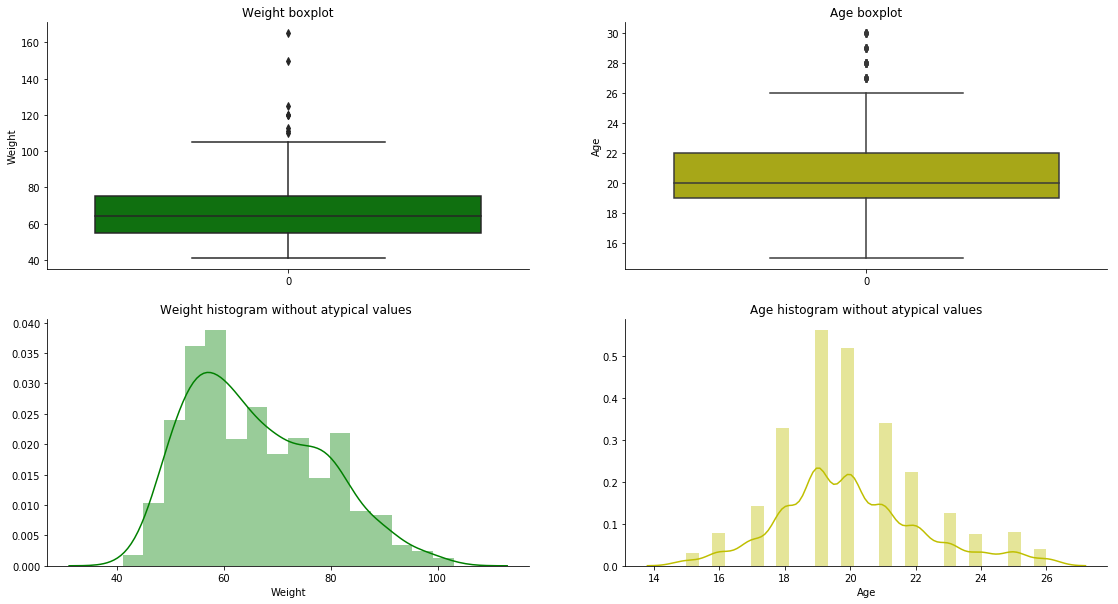

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(19,10))
b1 = sns.boxplot(data=dsw, ax=ax[0][0], color="g")
b1.set_ylabel('Weight')
ax[0][0].set_title("Weight boxplot")
ax[0][1].set_title("Age boxplot")

b2 = sns.boxplot(data=dsa, ax=ax[0][1], color="y")
b2.set_ylabel('Age')

# Representamos las distribuciones sin los valores atípicos.
d1 = sns.distplot(dataset[dataset.Weight < 105].Weight, 
                  ax=ax[1][0], color="g")
d1.set_xlabel('Weight')

d2 = sns.distplot(dataset[dataset.Age <= 26].Age, 
                  ax=ax[1][1], color="y")
d2.set_xlabel('Age')

ax[1][0].set_title("Weight histogram without atypical values ")
ax[1][1].set_title("Age histogram without atypical values")
sns.despine()

Para ver los valores atípicos usamos un diagrama de caja. El diagrama de caja muestra los cuartiles de la distribución, donde Q2 corresponde a la mediana. Para obtener los outliers basta con conocer el rango intercualtil IQR = Q3 - Q1 y multiplicarlo por un factor que suele ser 1.5. Los valores mayores a Q3 + 1.5 x IQR o menores a Q1 - 1.5 x IQR son considerados atípicos. Vemos que para el peso hay valorea atípicos que deben de corresponder a jovenes con problemas de obesidad. En la distribución de la edad existen valores atípicos que salen del rango de edad de los encuestados.
Los dos histogramas inferiores muestran las distribuciones sin los datos atípicos. Se puede observar que las distribuciones se hacen simétricas en torno a la media.

***Explicar cómo varían las métricas cuando desglosamos por género. ¿Responden a alguna distribución conocida? Comparar cualitativamente y gráficamente ambas distribuciones. Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.***

In [8]:
peso_mujer = dataset[dataset["Gender"] == "female"].Weight.dropna()
peso_hombre = dataset[dataset["Gender"] == "male"].Weight.dropna()
edad_mujer = dataset[dataset["Gender"] == "female"].Age.dropna()
edad_hombre = dataset[dataset["Gender"] == "male"].Age.dropna()

print("Moda de peso para la mujer {:.0f} y para el hombre {:.0f}"
      .format(peso_mujer.mode().values[0], peso_hombre.mode().values[0])
     )
print("Media de peso para la mujer {:.2f} y para el hombre {:.2f}"
      .format(peso_mujer.mean(), peso_hombre.mean())
     )
print("Mediana de peso de la mujer {:.0f} y para el hombre {:.0f}"
      .format(peso_mujer.median(), peso_hombre.median())
     )
print("Desviación estandar de peso para la mujer {:.2f} y para el hombre "
      "{:.2f}".format(peso_mujer.std(), peso_hombre.std()))
print()
print("Moda de edad para la mujer {:.0f} y para el hombre {:.0f}"
      .format(edad_mujer.mode().values[0], edad_hombre.mode().values[0])
     )
print("Media de edad para la mujer {:.2f} y para el hombre {:.2f}".
      format(edad_mujer.mean(), edad_hombre.mean())
     )
print("Mediana de edad para la mujer {:.0f} y para el hombre {:.0f}"
      .format(edad_mujer.median(), edad_hombre.median())
     )
print("Desviación estandar de edad para la mujer {:.2f} y para el hombre"
      "{:.2f}".format(edad_mujer.std(),edad_hombre.std())
     )

Moda de peso para la mujer 60 y para el hombre 80
Media de peso para la mujer 58.96 y para el hombre 77.09
Mediana de peso de la mujer 57 y para el hombre 77
Desviación estandar de peso para la mujer 10.01 y para el hombre 11.35

Moda de edad para la mujer 19 y para el hombre 19
Media de edad para la mujer 20.11 y para el hombre 20.87
Mediana de edad para la mujer 20 y para el hombre 20
Desviación estandar de edad para la mujer 2.79 y para el hombre2.80


*   Se observa que la **edad** tiene una distribución casi identica entre hombre y mujeres, esto quiere decir que la edad no es dependiente del género.

*   Observamos que en el caso del **peso** las distibuciones son similares como se puede ver gracias a la desviación típica.


 Sin embargo, la función de distribución para el género másculino está deplazada a la derecha. Esto ocurre porque la media de peso del hombre es mayor al de la mujer. También se observa que el peso si puede estar relacionado con el sexo.

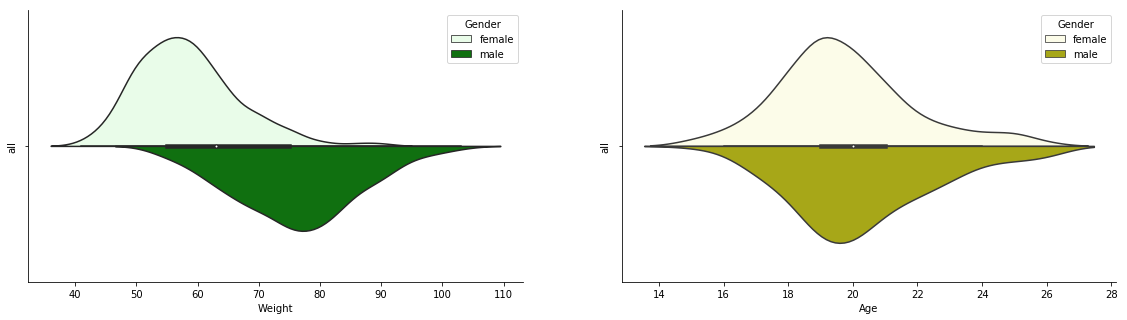

In [9]:
variable = "Gender"
dataset.dropna(subset=[variable], inplace=True)
dataset["all"] = ""

# datos sin putos atípicos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19.5,5))

data_weight = dataset[dataset["Weight"] < 105].dropna()
sns.violinplot(x='Weight',
               y="all", 
               hue=variable, 
               data=data_weight, 
               split=True, 
               ax=ax[0], color="g")

data_age = dataset[dataset["Age"] <= 26].dropna()
sns.violinplot(x='Age', 
               y="all", 
               hue=variable, 
               data=data_age, 
               split=True, 
               ax=ax[1], color="y")
sns.despine()

En los gráficos de la parte superior se observa como las distribución de los valores de edad y peso son similares para hombres y mujeres.
La única diferencia está marcada por la media en el peso. **Los hombres pesan más que las mujeres**.

Creamos un gráfico que muestra las relaciones por pares del conjunto de datos y, además, discriminamos por género. A simple vista se puede observar que no existe relación entre las variables peso y edad para la muestra de población usada en la encuesta.

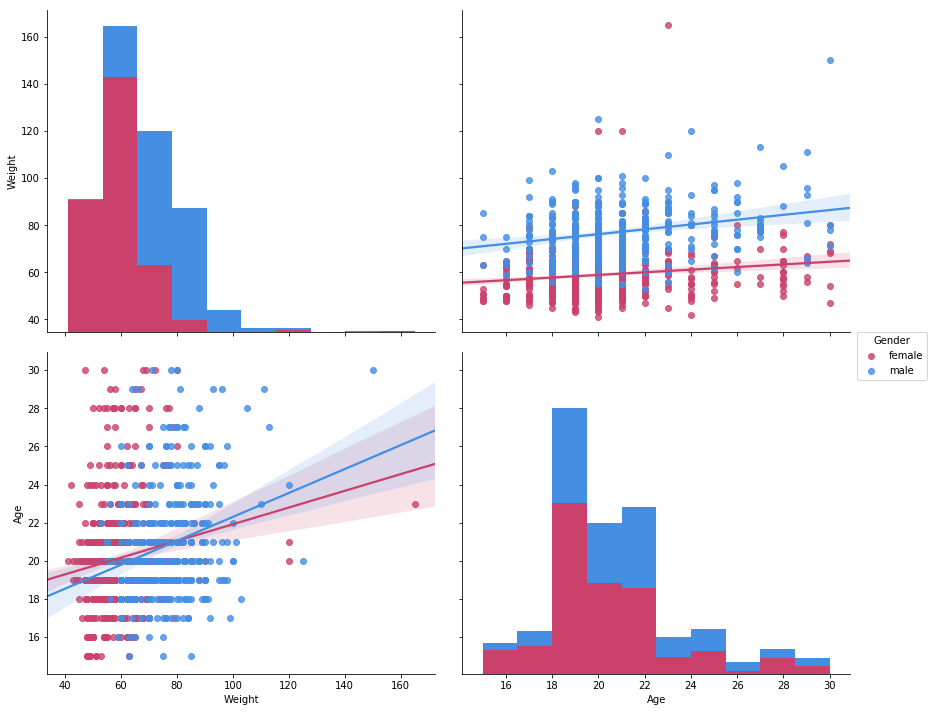

In [10]:
colors = ["dark pink", "dark sky blue"]

data = dataset.loc[:, ["Weight", "Age", "Gender"]].dropna()
sns.pairplot(data, kind="reg", hue="Gender", size=5, aspect=1.2, palette=sns.xkcd_palette(colors));

A continuación obtenemos la matriz de correlación.

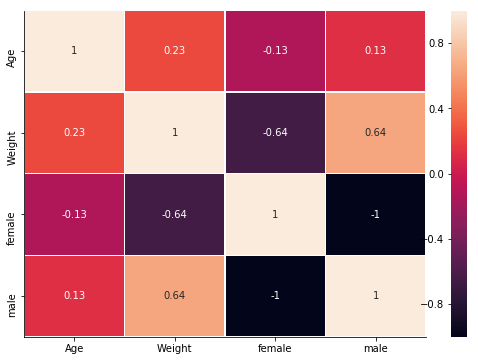

In [11]:
ds = dataset
ds = ds.join(ds.Gender.str.get_dummies())
corr = ds.loc[:, ["Age", "Weight", "female", "male"]].corr()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
sns.despine()

Vemos como el coeficiente de correlación entre la edad y el peso es muy bajo. Con esto podemos deducir que no existe una relación lineal entres ambas variables.

***Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.***

In [12]:
df = pd.crosstab(index=dataset.Smoking, 
                 columns=dataset.Alcohol, 
                 margins=True)

df

Alcohol,drink a lot,never,social drinker,All
Smoking,,,,
current smoker,78,11,99,188
former smoker,54,11,109,174
never smoked,15,60,131,206
tried smoking,72,39,315,426
All,219,121,654,994


In [13]:
# Calculo de probabilidades:
print('Probabilidad Marginal:')
print('......................')
print('Current smoker {:.2f}'.format(df.iloc[0, 3] / df.iloc[4, 3]))
print('Former smoker {:.2f}'.format(df.iloc[1, 3] / df.iloc[4, 3]))
print('Never smoker {:.2f}'.format(df.iloc[2, 3] / df.iloc[4, 3]))
print('Tried smoking {:.2f}'.format(df.iloc[3, 3] / df.iloc[4, 3]))
print()
print('Drink a lot {:.2f}'.format(df.iloc[4, 0] / df.iloc[4, 3]))
print('Never drink {:.2f}'.format(df.iloc[4, 1] / df.iloc[4, 3]))
print('Social drinker {:.2f}'.format(df.iloc[4, 2] / df.iloc[4, 3]))
print('......................')

Probabilidad Marginal:
......................
Current smoker 0.19
Former smoker 0.18
Never smoker 0.21
Tried smoking 0.43

Drink a lot 0.22
Never drink 0.12
Social drinker 0.66
......................


In [14]:
# Para obtener la probabilidad conjunta basta con normalizar
# la tabla de doble entrada
fpc = pd.crosstab(index=dataset.Smoking, 
                  columns=dataset.Alcohol,
                  margins=True,
                  normalize=True)
fpc

Alcohol,drink a lot,never,social drinker,All
Smoking,,,,
current smoker,0.078471,0.011066,0.099598,0.189135
former smoker,0.054326,0.011066,0.109658,0.175050
never smoked,0.015091,0.060362,0.131791,0.207243
tried smoking,0.072435,0.039235,0.316901,0.428571
All,0.220322,0.121730,0.657948,1.000000


In [15]:
# Mostramos la tabla de correlación entre los distintos datos de las 
# variables estudiadas.
ds = dataset
ds['Smoking'] = ds['Smoking'].astype("category").cat.codes
ds['Alcohol'] = ds['Alcohol'].astype("category").cat.codes

ds['Alcohol'].corr(dataset['Smoking'])


0.2334468025708971

Podemos observar que la fuerza de la correlación es débil.

***Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.***

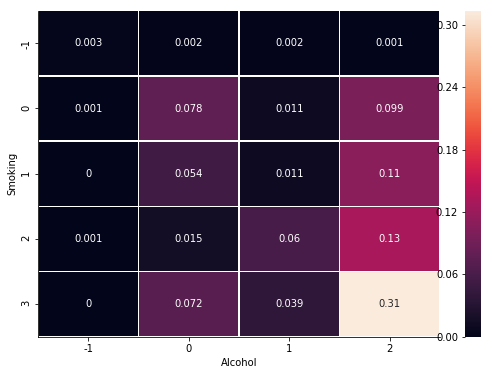

In [16]:
# Representamos la probabilidad conjunta mediante un mapa de calor
fpc_not_margins = pd.crosstab(index=dataset.Smoking, 
            columns=dataset.Alcohol,
            normalize=True)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(fpc_not_margins, annot=True, linewidths=.5, ax=ax)
sns.despine()


***Responda a la siguientes preguntas: ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?***

Vemos que el conjunto de datos que muestra más probabilidad es el de bebedores sociales que intentan fumar. Si se prohibe fumar en los bares el consumo de tabaco bajaría ya que los bebedores sociales no tendrian la tentación de agarrar un cigarro.
Si disminuye la cantidad de fumadores que consume alcohol bajaría la cantidad de consumidores de alcohol. Si nos fijamos en la tabla de abajo vemos que disminuyendo las cantidades de los numeros en la fila 0, columnas 0 y 3, el total de fumadores disminuye, fila 0 y columna 4.

In [17]:
df

Alcohol,drink a lot,never,social drinker,All
Smoking,,,,
current smoker,78,11,99,188
former smoker,54,11,109,174
never smoked,15,60,131,206
tried smoking,72,39,315,426
All,219,121,654,994
